In [1]:
import sys
sys.path.insert(0, '../..')
import copy
import numpy as np
from model.base import CovidModel, SimulationParameters, set_parameters, normal_ci
from utils import BasicStatistics, RemovePolicy, Propaganda, setup_city_layout, AddPolicyInfectedRate, confidence_interval, multiple_runs
from model.utils import SocialPolicy

In [2]:
listeners = [
    
["Propaganda", 1],
["AddPolicyInfectedRate", SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 0.02],
["AddPolicyInfectedRate", SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 0.02],
["AddPolicyInfectedRate", SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 0.02],
["AddPolicyInfectedRate", SocialPolicy.LOCKDOWN_RETAIL, 0.02],
["AddPolicyInfectedRate", SocialPolicy.LOCKDOWN_FACTORY, 0.02],
["AddPolicyInfectedRate", SocialPolicy.LOCKDOWN_OFFICE, 0.02],
["RemovePolicy", SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 120],
["RemovePolicy", SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 120],
["RemovePolicy", SocialPolicy.LOCKDOWN_HIGH_SCHOOL,120],
["RemovePolicy", SocialPolicy.LOCKDOWN_RETAIL, 120],
["RemovePolicy", SocialPolicy.LOCKDOWN_FACTORY, 120],
["RemovePolicy", SocialPolicy.LOCKDOWN_OFFICE,120],
["AddPolicyInfectedRate", SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 0.02],
["AddPolicyInfectedRate", SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 0.02],
["AddPolicyInfectedRate", SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 0.02],
["AddPolicyInfectedRate", SocialPolicy.LOCKDOWN_RETAIL, 0.02],
["AddPolicyInfectedRate", SocialPolicy.LOCKDOWN_FACTORY, 0.02],
["AddPolicyInfectedRate", SocialPolicy.LOCKDOWN_OFFICE, 0.02],
["RemovePolicy", SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 205],
["RemovePolicy", SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 205],
["RemovePolicy", SocialPolicy.LOCKDOWN_HIGH_SCHOOL,205],
["RemovePolicy", SocialPolicy.LOCKDOWN_RETAIL, 205],
["RemovePolicy", SocialPolicy.LOCKDOWN_FACTORY, 205],
["RemovePolicy", SocialPolicy.LOCKDOWN_OFFICE,205]

]

In [3]:
common_parameters = SimulationParameters(
    mask_user_rate = 0.9, # 0.0,
    mask_efficacy = 0.6, #0.0,
    imune_rate = 0.01,
    initial_infection_rate = 0.01,
    hospitalization_capacity = 0.05,
    latency_period_shape = 3,
    latency_period_scale = 1, 
    incubation_period_shape = 6,
    incubation_period_scale = 1, 
    mild_period_duration_shape = 14,
    mild_period_duration_scale = 1,
    hospitalization_period_duration_shape = 12,
    hospitalization_period_duration_scale = 1,
    symptomatic_isolation_rate = 0.0,
    asymptomatic_contagion_probability = 0.1,
#    asymptomatic_contagion_probability = 0.05,
    risk_tolerance_mean = 0.7,
    risk_tolerance_stdev = 0.2,
    herding_behavior_mean = 0.7,
#    herding_behavior_mean = 0.1,
    herding_behavior_stdev = 0.2,
    allowed_restaurant_capacity = 0.25, #1.0, # valid values: {1.0, 0.50, 0.25}
    spreading_rate = normal_ci(2.41, 3.90, 20)
#    spreading_rate = normal_ci(0.5, 1.5, 20)
)

sc = 10

population_size = 1000
simulation_cycles = 360 # days
seed = 31415

params = copy.deepcopy(common_parameters)
params.params['social_policies'] = [
    SocialPolicy.LOCKDOWN_OFFICE,
    SocialPolicy.LOCKDOWN_FACTORY,
    SocialPolicy.LOCKDOWN_RETAIL,
    SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,
    SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL,
    SocialPolicy.LOCKDOWN_HIGH_SCHOOL,
    SocialPolicy.SOCIAL_DISTANCING
]

set_parameters(params)
model = CovidModel()
np.random.seed(seed)
setup_city_layout(model, population_size)
model.add_listener(Propaganda(model, 1))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_RETAIL, 60))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_FACTORY, 60))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_OFFICE, 60))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 60))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 60))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 60))
model.add_listener(AddPolicyInfectedRate(model, SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 0.02))
model.add_listener(AddPolicyInfectedRate(model, SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 0.02))
model.add_listener(AddPolicyInfectedRate(model, SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 0.02))
model.add_listener(AddPolicyInfectedRate(model, SocialPolicy.LOCKDOWN_RETAIL, 0.02))
model.add_listener(AddPolicyInfectedRate(model, SocialPolicy.LOCKDOWN_FACTORY, 0.02))
model.add_listener(AddPolicyInfectedRate(model, SocialPolicy.LOCKDOWN_OFFICE, 0.02))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 120))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 120))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_HIGH_SCHOOL,120))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_RETAIL, 120))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_FACTORY, 120))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_OFFICE,120))
model.add_listener(AddPolicyInfectedRate(model, SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 0.02))
model.add_listener(AddPolicyInfectedRate(model, SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 0.02))
model.add_listener(AddPolicyInfectedRate(model, SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 0.02))
model.add_listener(AddPolicyInfectedRate(model, SocialPolicy.LOCKDOWN_RETAIL, 0.02))
model.add_listener(AddPolicyInfectedRate(model, SocialPolicy.LOCKDOWN_FACTORY, 0.02))
model.add_listener(AddPolicyInfectedRate(model, SocialPolicy.LOCKDOWN_OFFICE, 0.02))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 205))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 205))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_HIGH_SCHOOL,205))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_RETAIL, 205))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_FACTORY, 205))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_OFFICE,205))

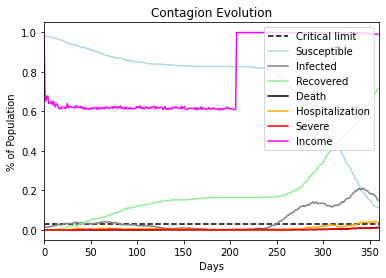

In [4]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

Save these seeds if you want to rerun a scenario
[31415]
run with seed 31415:


/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


using average of time series:
stats on susceptible:
data: [0.9318487068487068]
min:
0.9318487068487068
max:
0.9318487068487068
std:
0.0
mean:
0.9318487068487068
median:
0.9318487068487068
95% confidence interval for the mean:
(nan,nan)
using average of time series:
stats on infected:
data: [0.004373404373404373]
min:
0.004373404373404373
max:
0.004373404373404373
std:
0.0
mean:
0.004373404373404373
median:
0.004373404373404373
95% confidence interval for the mean:
(nan,nan)
using average of time series:
stats on recovered:
data: [0.05130980130980131]
min:
0.05130980130980131
max:
0.05130980130980131
std:
0.0
mean:
0.05130980130980131
median:
0.05130980130980131
95% confidence interval for the mean:
(nan,nan)
using average of time series:
stats on hospitalization:
data: [0.0010434010434010434]
min:
0.0010434010434010434
max:
0.0010434010434010434
std:
0.0
mean:
0.0010434010434010434
median:
0.0010434010434010434
95% confidence interval for the mean:
(nan,nan)
using average of time serie

(<function dict.items>, <function dict.items>, <function dict.items>)

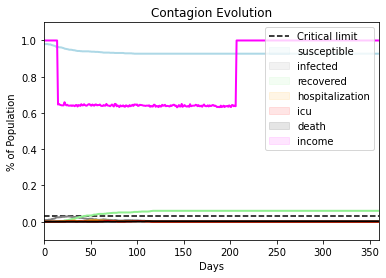

In [5]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)


setLevel(logging.CRITICAL)
seeds = [31415]
multiple_runs(params,population_size,simulation_cycles,num_runs=3,seeds = seeds,fname = "ikle0", do_print = True, listeners = listeners)

Save these seeds if you want to rerun a scenario
[31415, 7777, 12345]
run with seed 31415:
run with seed 7777:
run with seed 12345:
using average of time series:
stats on susceptible:
data: [0.9318487068487068, 0.9154888888888889, 0.9098805555555556]
min:
0.9098805555555556
max:
0.9318487068487068
std:
0.009319613235268578
mean:
0.9190727170977171
median:
0.9154888888888889
95% confidence interval for the mean:
(0.8907184003273715,0.9474270338680627)
using average of time series:
stats on infected:
data: [0.004373404373404373, 0.005116666666666668, 0.005363888888888889]
min:
0.004373404373404373
max:
0.005363888888888889
std:
0.00042092718282390405
mean:
0.004951319976319976
median:
0.005116666666666668
95% confidence interval for the mean:
(0.0036706764155044203,0.006231963537135532)
using average of time series:
stats on recovered:
data: [0.05130980130980131, 0.0656472222222222, 0.06996666666666665]
min:
0.05130980130980131
max:
0.06996666666666665
std:
0.007974249276213808
mean:
0.0

(<function dict.items>, <function dict.items>, <function dict.items>)

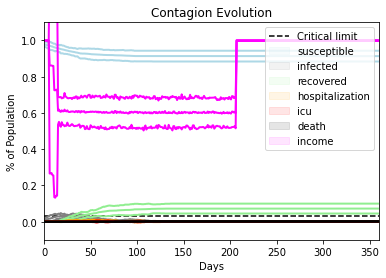

In [6]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)


setLevel(logging.CRITICAL)
seeds = [31415, 7777, 12345]
multiple_runs(params,population_size,simulation_cycles,num_runs=3,seeds = seeds,fname = "ikle1", do_print = True, listeners = listeners)

In [7]:
listeners = [
    
["Propaganda", 1],
["AddPolicyInfectedRate", SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 0.02],
["AddPolicyInfectedRate", SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 0.02],
["AddPolicyInfectedRate", SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 0.02],
["AddPolicyInfectedRate", SocialPolicy.LOCKDOWN_RETAIL, 0.02],
["AddPolicyInfectedRate", SocialPolicy.LOCKDOWN_FACTORY, 0.02],
["AddPolicyInfectedRate", SocialPolicy.LOCKDOWN_OFFICE, 0.02],
["RemovePolicy", SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 120],
["RemovePolicy", SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 120],
["RemovePolicy", SocialPolicy.LOCKDOWN_HIGH_SCHOOL,120],
["RemovePolicy", SocialPolicy.LOCKDOWN_RETAIL, 120],
["RemovePolicy", SocialPolicy.LOCKDOWN_FACTORY, 120],
["RemovePolicy", SocialPolicy.LOCKDOWN_OFFICE,120],
["AddPolicyInfectedRate", SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 0.02],
["AddPolicyInfectedRate", SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 0.02],
["AddPolicyInfectedRate", SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 0.02],
["AddPolicyInfectedRate", SocialPolicy.LOCKDOWN_RETAIL, 0.02],
["AddPolicyInfectedRate", SocialPolicy.LOCKDOWN_FACTORY, 0.02],
["AddPolicyInfectedRate", SocialPolicy.LOCKDOWN_OFFICE, 0.02],
["RemovePolicy", SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 130],
["RemovePolicy", SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 130],
["RemovePolicy", SocialPolicy.LOCKDOWN_HIGH_SCHOOL,130],
["RemovePolicy", SocialPolicy.LOCKDOWN_RETAIL, 130],
["RemovePolicy", SocialPolicy.LOCKDOWN_FACTORY, 130],
["RemovePolicy", SocialPolicy.LOCKDOWN_OFFICE,130]

]

In [8]:
common_parameters = SimulationParameters(
    mask_user_rate = 0.9, # 0.0,
    mask_efficacy = 0.6, #0.0,
    imune_rate = 0.01,
    initial_infection_rate = 0.01,
    hospitalization_capacity = 0.05,
    latency_period_shape = 3,
    latency_period_scale = 1, 
    incubation_period_shape = 6,
    incubation_period_scale = 1, 
    mild_period_duration_shape = 14,
    mild_period_duration_scale = 1,
    hospitalization_period_duration_shape = 12,
    hospitalization_period_duration_scale = 1,
    symptomatic_isolation_rate = 0.0,
    asymptomatic_contagion_probability = 0.1,
#    asymptomatic_contagion_probability = 0.05,
    risk_tolerance_mean = 0.7,
    risk_tolerance_stdev = 0.2,
    herding_behavior_mean = 0.7,
#    herding_behavior_mean = 0.1,
    herding_behavior_stdev = 0.2,
    allowed_restaurant_capacity = 0.25, #1.0, # valid values: {1.0, 0.50, 0.25}
    spreading_rate = normal_ci(2.41, 3.90, 20)
#    spreading_rate = normal_ci(0.5, 1.5, 20)
)

sc = 10

population_size = 1000
simulation_cycles = 360 # days
seed = 31415

params = copy.deepcopy(common_parameters)
params.params['social_policies'] = [
    SocialPolicy.LOCKDOWN_OFFICE,
    SocialPolicy.LOCKDOWN_FACTORY,
    SocialPolicy.LOCKDOWN_RETAIL,
    SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,
    SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL,
    SocialPolicy.LOCKDOWN_HIGH_SCHOOL,
    SocialPolicy.SOCIAL_DISTANCING
]

set_parameters(params)
model = CovidModel()
np.random.seed(seed)
setup_city_layout(model, population_size)
model.add_listener(Propaganda(model, 1))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_RETAIL, 60))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_FACTORY, 60))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_OFFICE, 60))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 60))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 60))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 60))
model.add_listener(AddPolicyInfectedRate(model, SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 0.02))
model.add_listener(AddPolicyInfectedRate(model, SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 0.02))
model.add_listener(AddPolicyInfectedRate(model, SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 0.02))
model.add_listener(AddPolicyInfectedRate(model, SocialPolicy.LOCKDOWN_RETAIL, 0.02))
model.add_listener(AddPolicyInfectedRate(model, SocialPolicy.LOCKDOWN_FACTORY, 0.02))
model.add_listener(AddPolicyInfectedRate(model, SocialPolicy.LOCKDOWN_OFFICE, 0.02))
#model.add_listener(AddPolicy(model, SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 80))
#model.add_listener(AddPolicy(model, SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 80))
#model.add_listener(AddPolicy(model, SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 80))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 120))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 120))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_HIGH_SCHOOL,120))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_RETAIL, 120))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_FACTORY, 120))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_OFFICE,120))
model.add_listener(AddPolicyInfectedRate(model, SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 0.02))
model.add_listener(AddPolicyInfectedRate(model, SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 0.02))
model.add_listener(AddPolicyInfectedRate(model, SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 0.02))
model.add_listener(AddPolicyInfectedRate(model, SocialPolicy.LOCKDOWN_RETAIL, 0.02))
model.add_listener(AddPolicyInfectedRate(model, SocialPolicy.LOCKDOWN_FACTORY, 0.02))
model.add_listener(AddPolicyInfectedRate(model, SocialPolicy.LOCKDOWN_OFFICE, 0.02))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 130))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 130))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_HIGH_SCHOOL,130))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_RETAIL, 130))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_FACTORY, 130))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_OFFICE,130))
#model.add_listener(AddPolicyInfectedRate(model, SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 0.05))
#model.add_listener(AddPolicyInfectedRate(model, SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 0.05))
#model.add_listener(AddPolicyInfectedRate(model, SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 0.05))
#model.add_listener(AddPolicyInfectedRate(model, SocialPolicy.LOCKDOWN_RETAIL, 0.05))
#model.add_listener(AddPolicyInfectedRate(model, SocialPolicy.LOCKDOWN_FACTORY, 0.05))
#model.add_listener(AddPolicyInfectedRate(model, SocialPolicy.LOCKDOWN_OFFICE, 0.05))

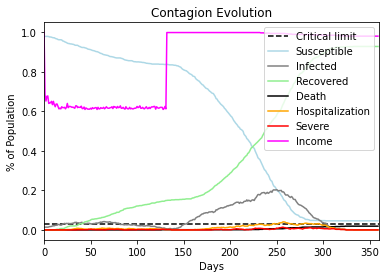

In [9]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

Save these seeds if you want to rerun a scenario
[31415, 7777, 12345]
run with seed 31415:
run with seed 7777:
run with seed 12345:
using average of time series:
stats on susceptible:
data: [0.9318487068487068, 0.9154888888888889, 0.9098805555555556]
min:
0.9098805555555556
max:
0.9318487068487068
std:
0.009319613235268578
mean:
0.9190727170977171
median:
0.9154888888888889
95% confidence interval for the mean:
(0.8907184003273715,0.9474270338680627)
using average of time series:
stats on infected:
data: [0.004373404373404373, 0.005136111111111111, 0.005363888888888889]
min:
0.004373404373404373
max:
0.005363888888888889
std:
0.0004235647476684886
mean:
0.004957801457801458
median:
0.005136111111111111
95% confidence interval for the mean:
(0.0036691332775926136,0.006246469638010302)
using average of time series:
stats on recovered:
data: [0.05130980130980131, 0.06562777777777777, 0.06996666666666665]
min:
0.05130980130980131
max:
0.06996666666666665
std:
0.007971539875441974
mean:
0.0

(<function dict.items>, <function dict.items>, <function dict.items>)

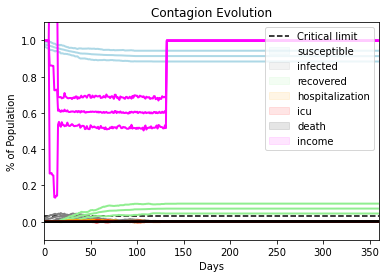

In [10]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)


setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs=5,seeds=seeds,fname = "ikle2",do_print = True, listeners = listeners)